In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/jupyterlab/conda/envs/python/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4>Linear Regression</h4>


In [58]:
from sklearn.linear_model import LinearRegression
# create linear regression model object
lm=LinearRegression()
lm
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
yhat=lm.predict(X)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
lm.intercept_


38423.3058581574

In [8]:
lm.coef_

array([-821.73337832])

<h4>Multiple Linear Regression</h4>


In [59]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
lm.intercept_


-15806.624626329209

In [10]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [12]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.
lm2=df[['normalized-losses','highway-mpg']]
lm.fit(lm2, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lm.coef_

array([   1.49789586, -820.45434016])

<h3>2)  Model Evaluation using Visualization</h3>


(0.0, 48284.56815392094)

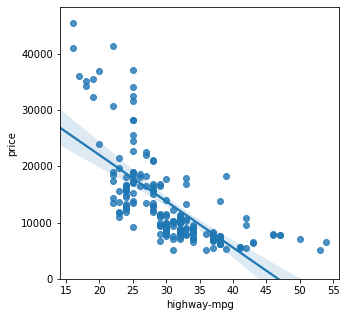

In [16]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

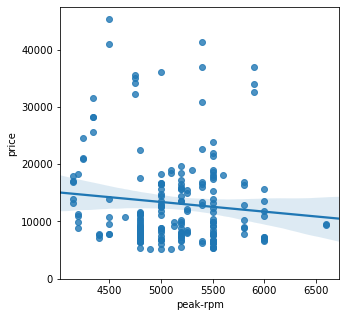

In [19]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

(4000.0, 7057.090671641791)

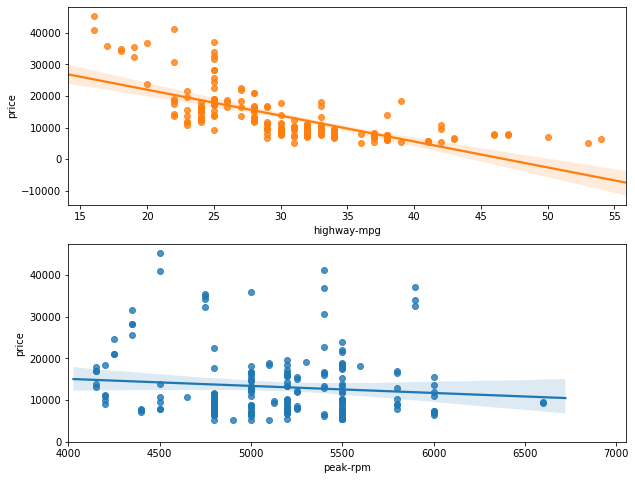

In [51]:
# subplots
fig, ax = plt.subplots(2, figsize=(10,8))
sns.regplot(ax=ax[1],x="peak-rpm", y="price", data=df)
plt.ylim(0,)
sns.regplot(ax=ax[0], x="highway-mpg", y="price", data=df)
plt.xlim(4000,)

In [53]:
# Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method ".corr()" to verify your answer.
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>



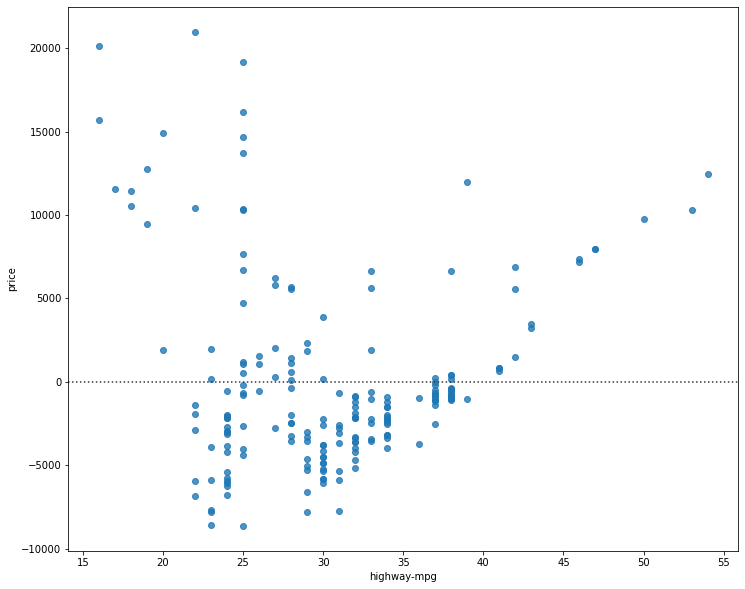

In [54]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<h3>Multiple Linear Regression</h3>


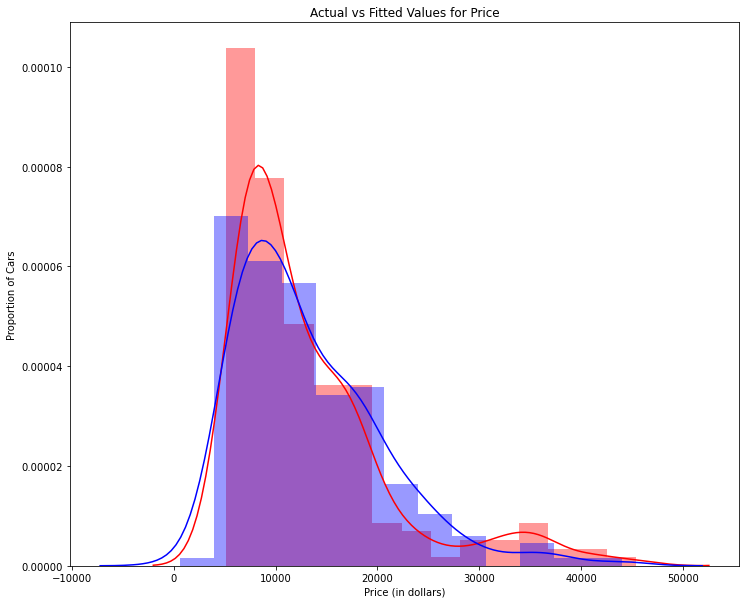

In [63]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=True, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=True, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


<h2>Part 3: Polynomial Regression and Pipelines</h2>


In [67]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


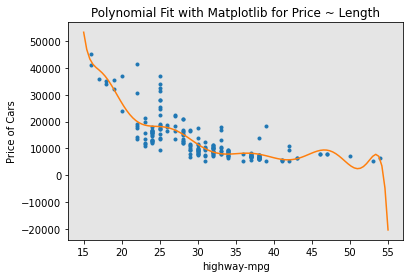

In [68]:
PlotPolly(p, x, y, 'highway-mpg')

In [69]:
np.polyfit(x, y, 11)

array([-1.24263391e-08,  4.72184893e-06, -8.02843483e-04,  8.05640304e-02,
       -5.29740981e+00,  2.39470329e+02, -7.58845740e+03,  1.68447254e+05,
       -2.56531152e+06,  2.55140622e+07, -1.49106964e+08,  3.87930087e+08])

In [70]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [71]:
Z_pr=pr.fit_transform(Z)

In [72]:
Z.shape

(201, 4)

In [73]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>Part 4: Measures for In-Sample Evaluation</h2>


In [75]:
# R square
# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [76]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [77]:
# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [78]:
lm.fit(Z, df['price'])
lm.score(Z, df['price'])

0.8093562806577457

In [79]:
mse=lm.predict(Z)
MSE=mean_squared_error(df['price'], mse)
MSE

11980366.87072649

In [83]:
# plynomial fit r square
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7023769091239798


In [84]:
mean_squared_error(df['price'], p(x))

18703127.64667095

<h2>Part 5: Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [85]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [86]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

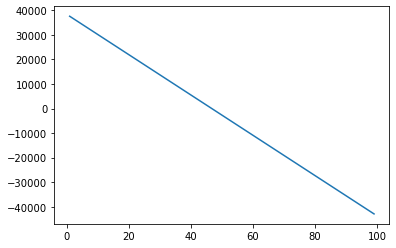

In [88]:
plt.plot(new_input, yhat)
plt.show()